## Delivery Time Estimation

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

import missingno as msno

In [ ]:
df = pd.read_csv('Zomato.csv')

In [3]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12/2/2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,4/3/2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,9:20,9:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [4]:
df.shape

(45584, 20)

In [5]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [6]:
# data types of the columns
(
    df.dtypes
    .rename('data_types').reset_index()
)


,index,data_types
0,ID,object
1,Delivery_person_ID,object
2,Delivery_person_Age,float64
3,Delivery_person_Ratings,float64
4,Restaurant_latitude,float64
5,Restaurant_longitude,float64
6,Delivery_location_latitude,float64
7,Delivery_location_longitude,float64
8,Order_Date,object
9,Time_Orderd,object


## Corrections :

1. Age column should be numerical.
2. Ratings should be float.
3. Date and time columns should be date and time.
4. Vehicle conditions seems to be categorical column which is integer encoded.
5. Multiple deliveries should be integer column.
6. Target column should also be numbers.

## Missing Values

<Axes: >

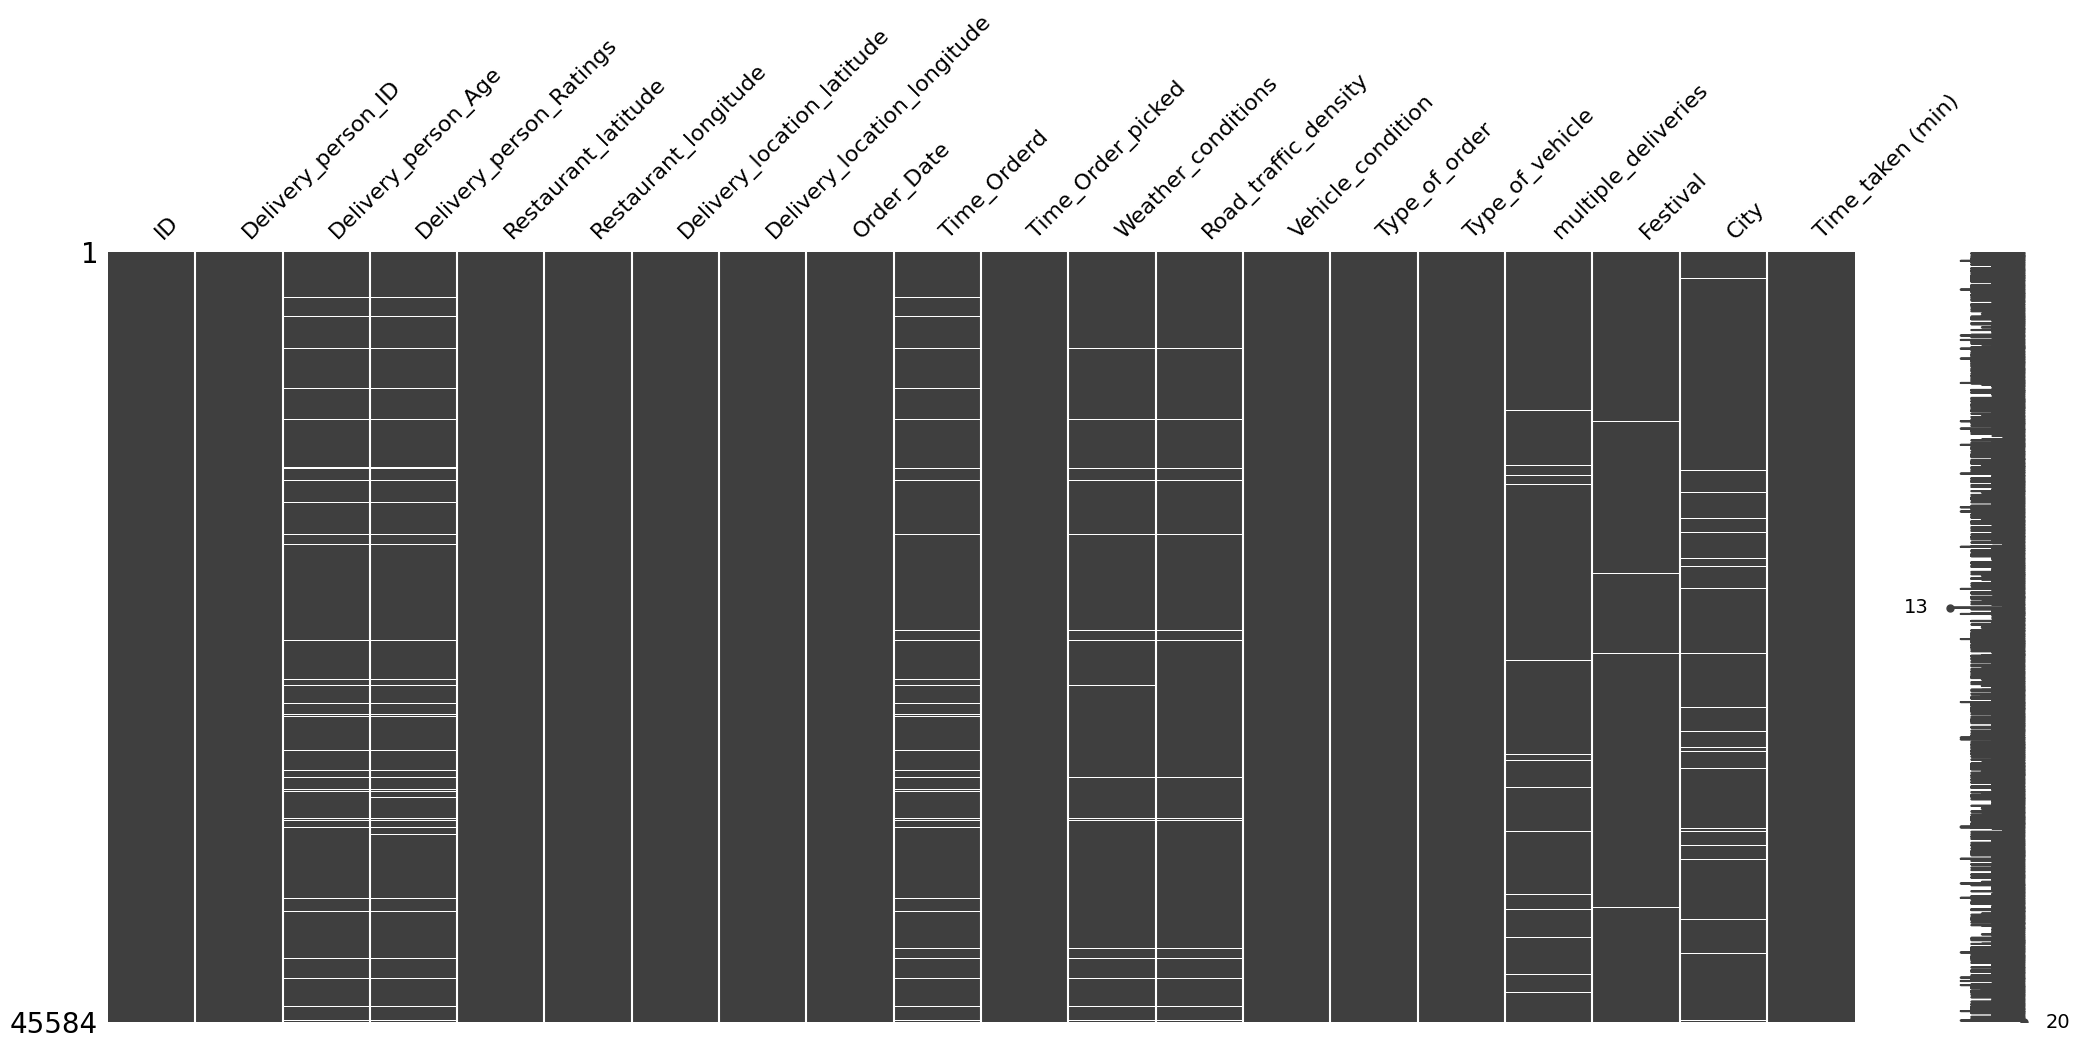

In [7]:
# missing values matrix

msno.matrix(df)

<Axes: >

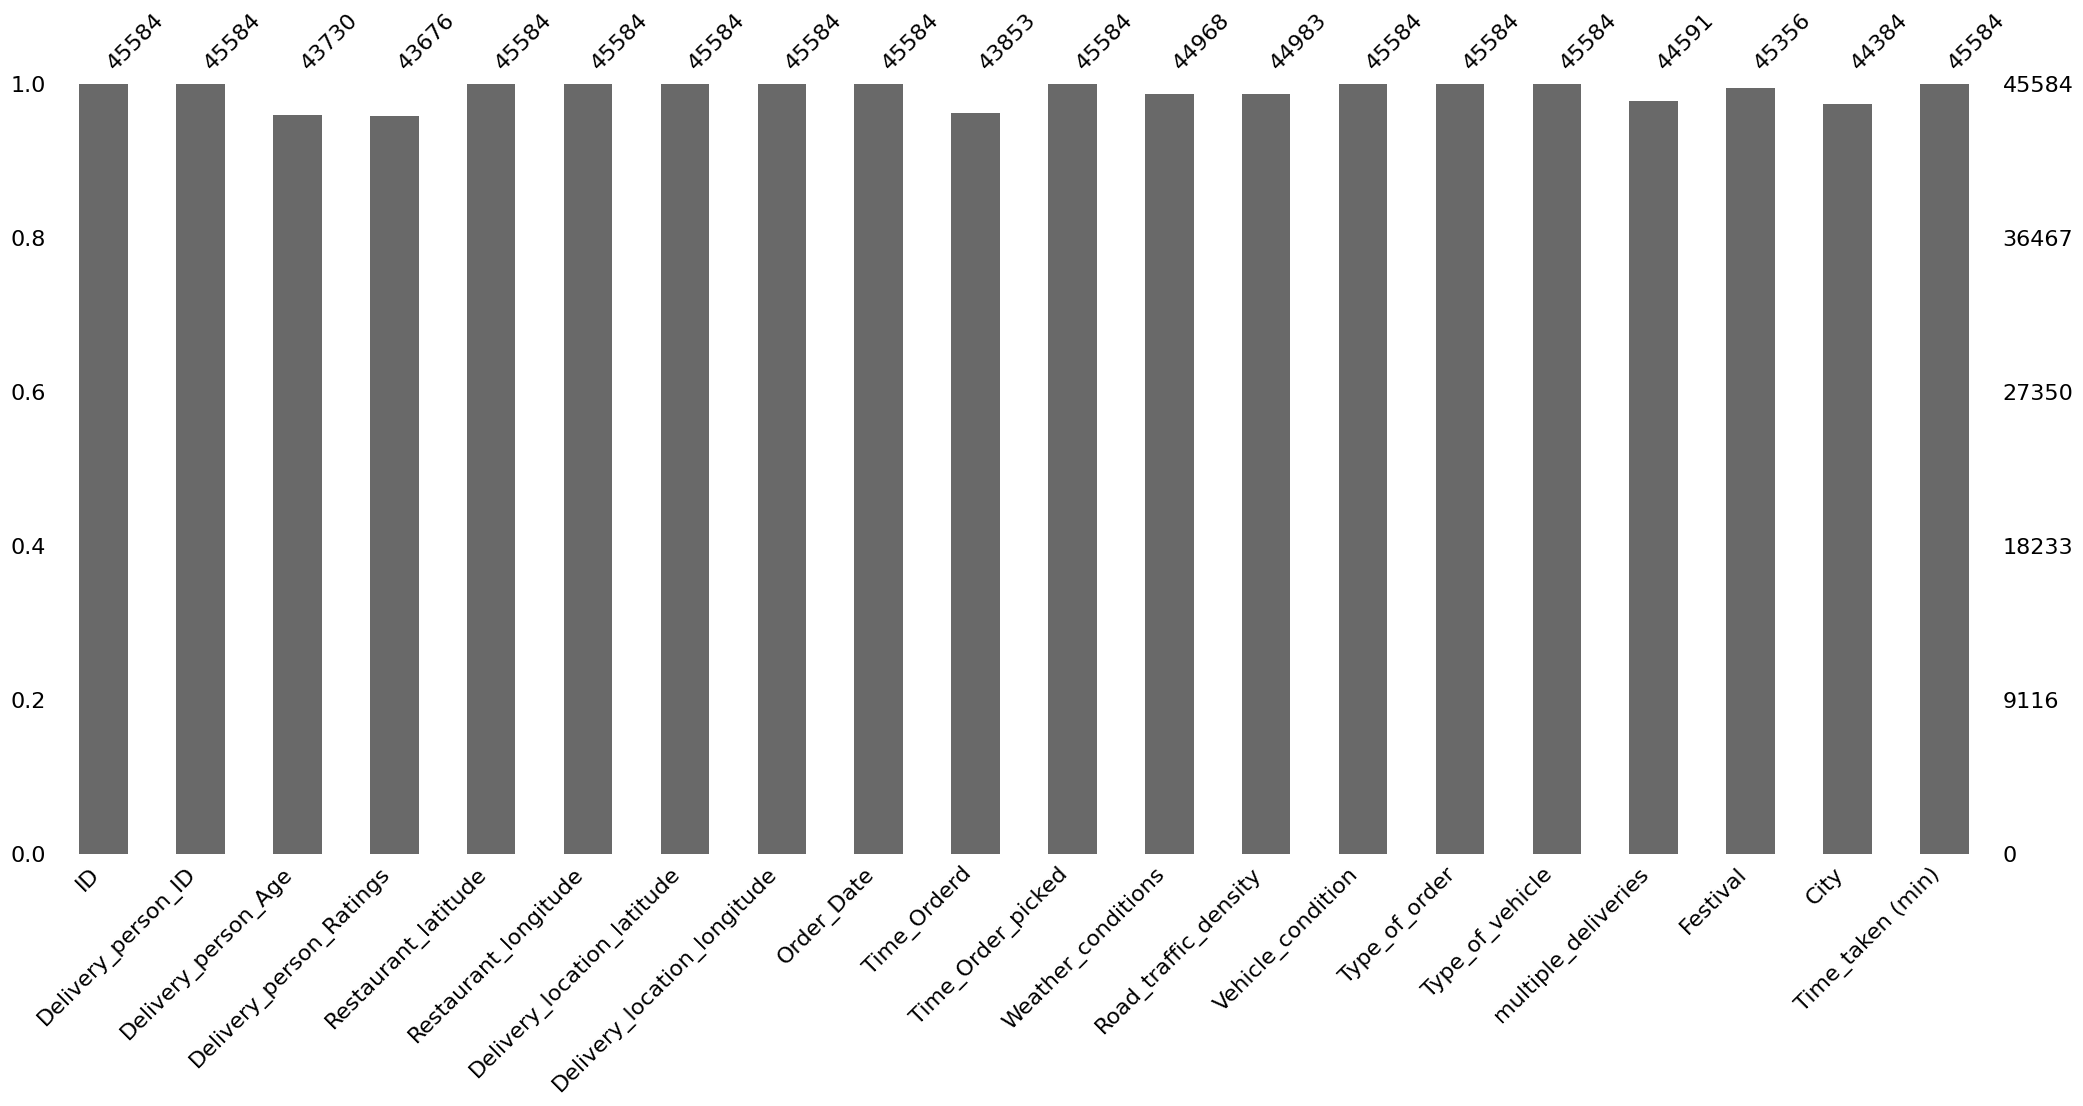

In [8]:
msno.bar(df)

<Axes: >

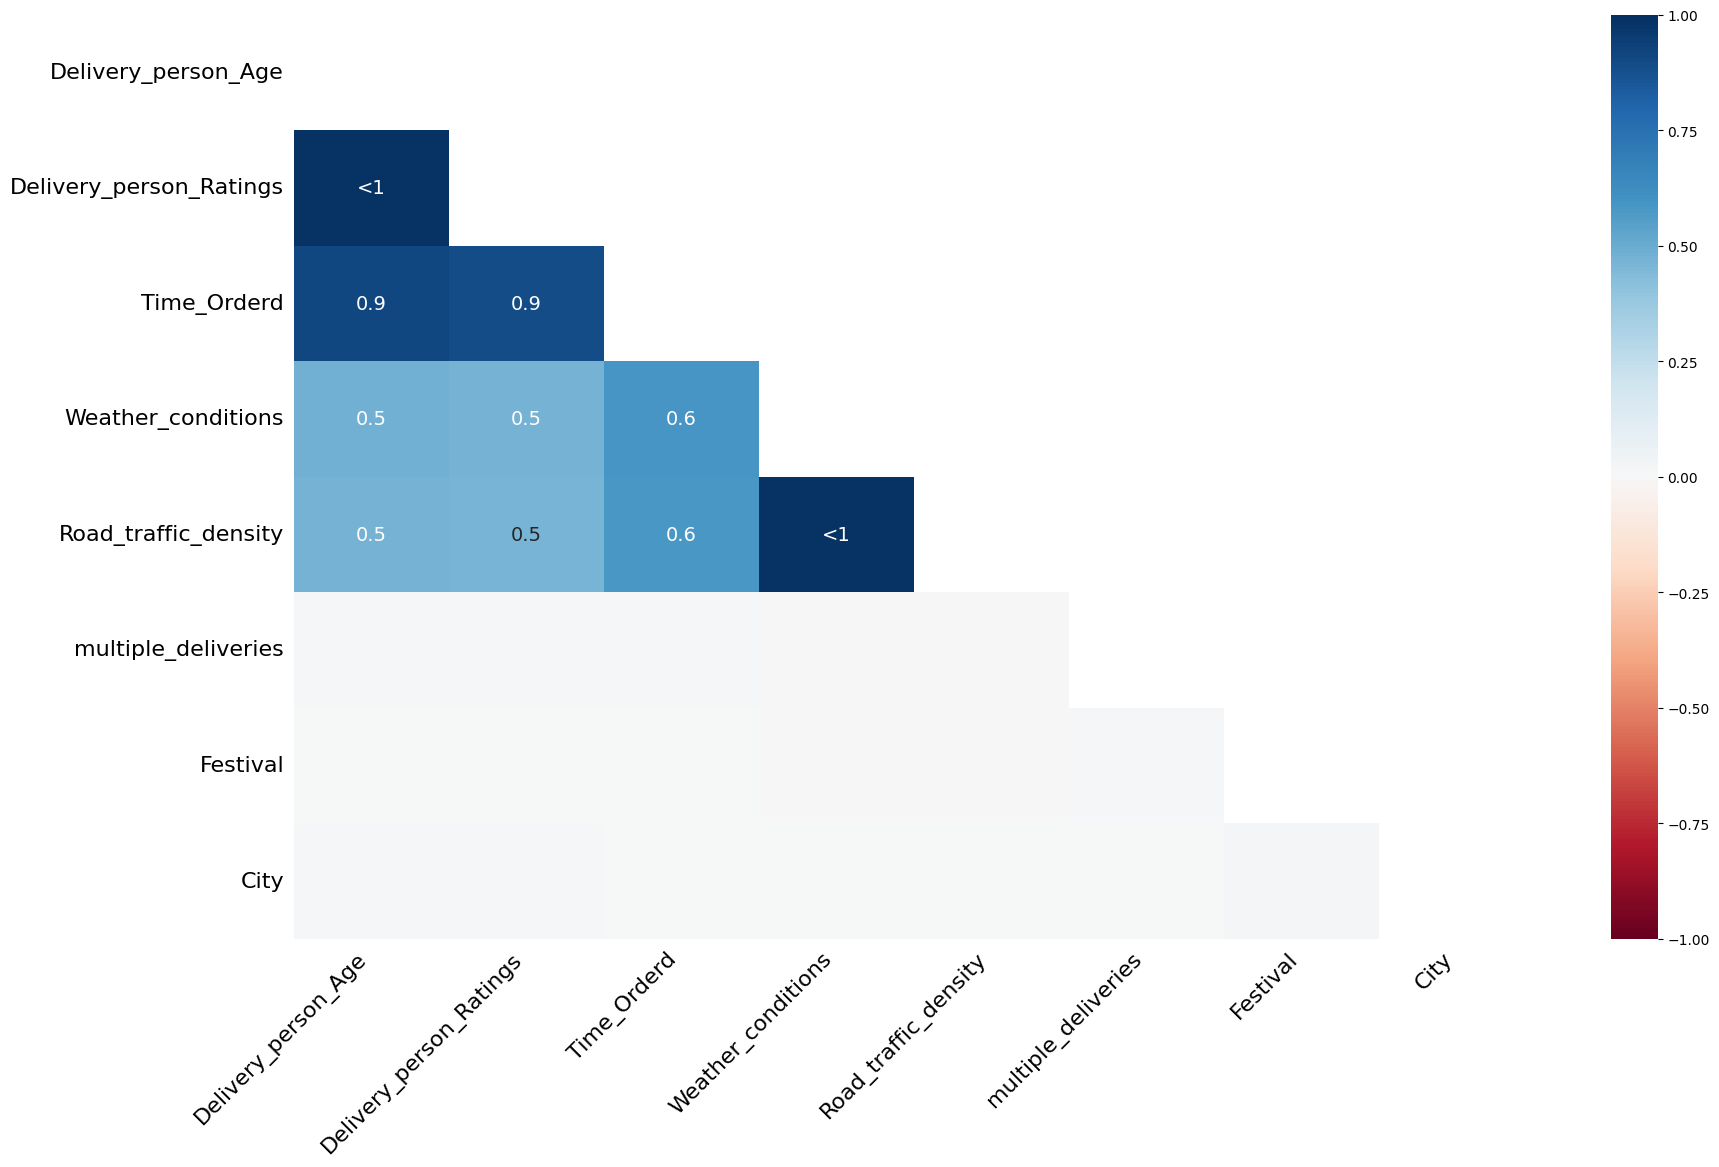

In [9]:
msno.heatmap(df)

## Observations

1. The delivery person columns are correlated to each other. This means that missingness in these columns is highly related which means lack of rider data.
2. The time ordered column is also related to the rider which shows that the data might be missing due to some network error where the system was unable to log rider details and time of order.
3. There is a very high correlation between weather patterns and the road traffic information. Be clear that this does not mean that the road traffic and weather columns are correlated. High corr in missingness means that if value in one column is missing, it is a high chance that it will be missing in others as well.
3. Road traffic density also shows correlation to the rider as it might be provided through the phone of rider (need to investigate).

In [10]:
df[["Weather_conditions","Road_traffic_density"]].isna().sum()

Weather_conditions      616
Road_traffic_density    601
dtype: int64

In [11]:
(df[["Weather_conditions","Road_traffic_density"]].isna().all(axis =1)
 .sum()/
 df[["Weather_conditions","Road_traffic_density"]].isna().sum()
).reset_index()

,index,0
0,Weather_conditions,0.975649
1,Road_traffic_density,1.000000


 it is showing that 97% of the missing values are correlated 

<Axes: >

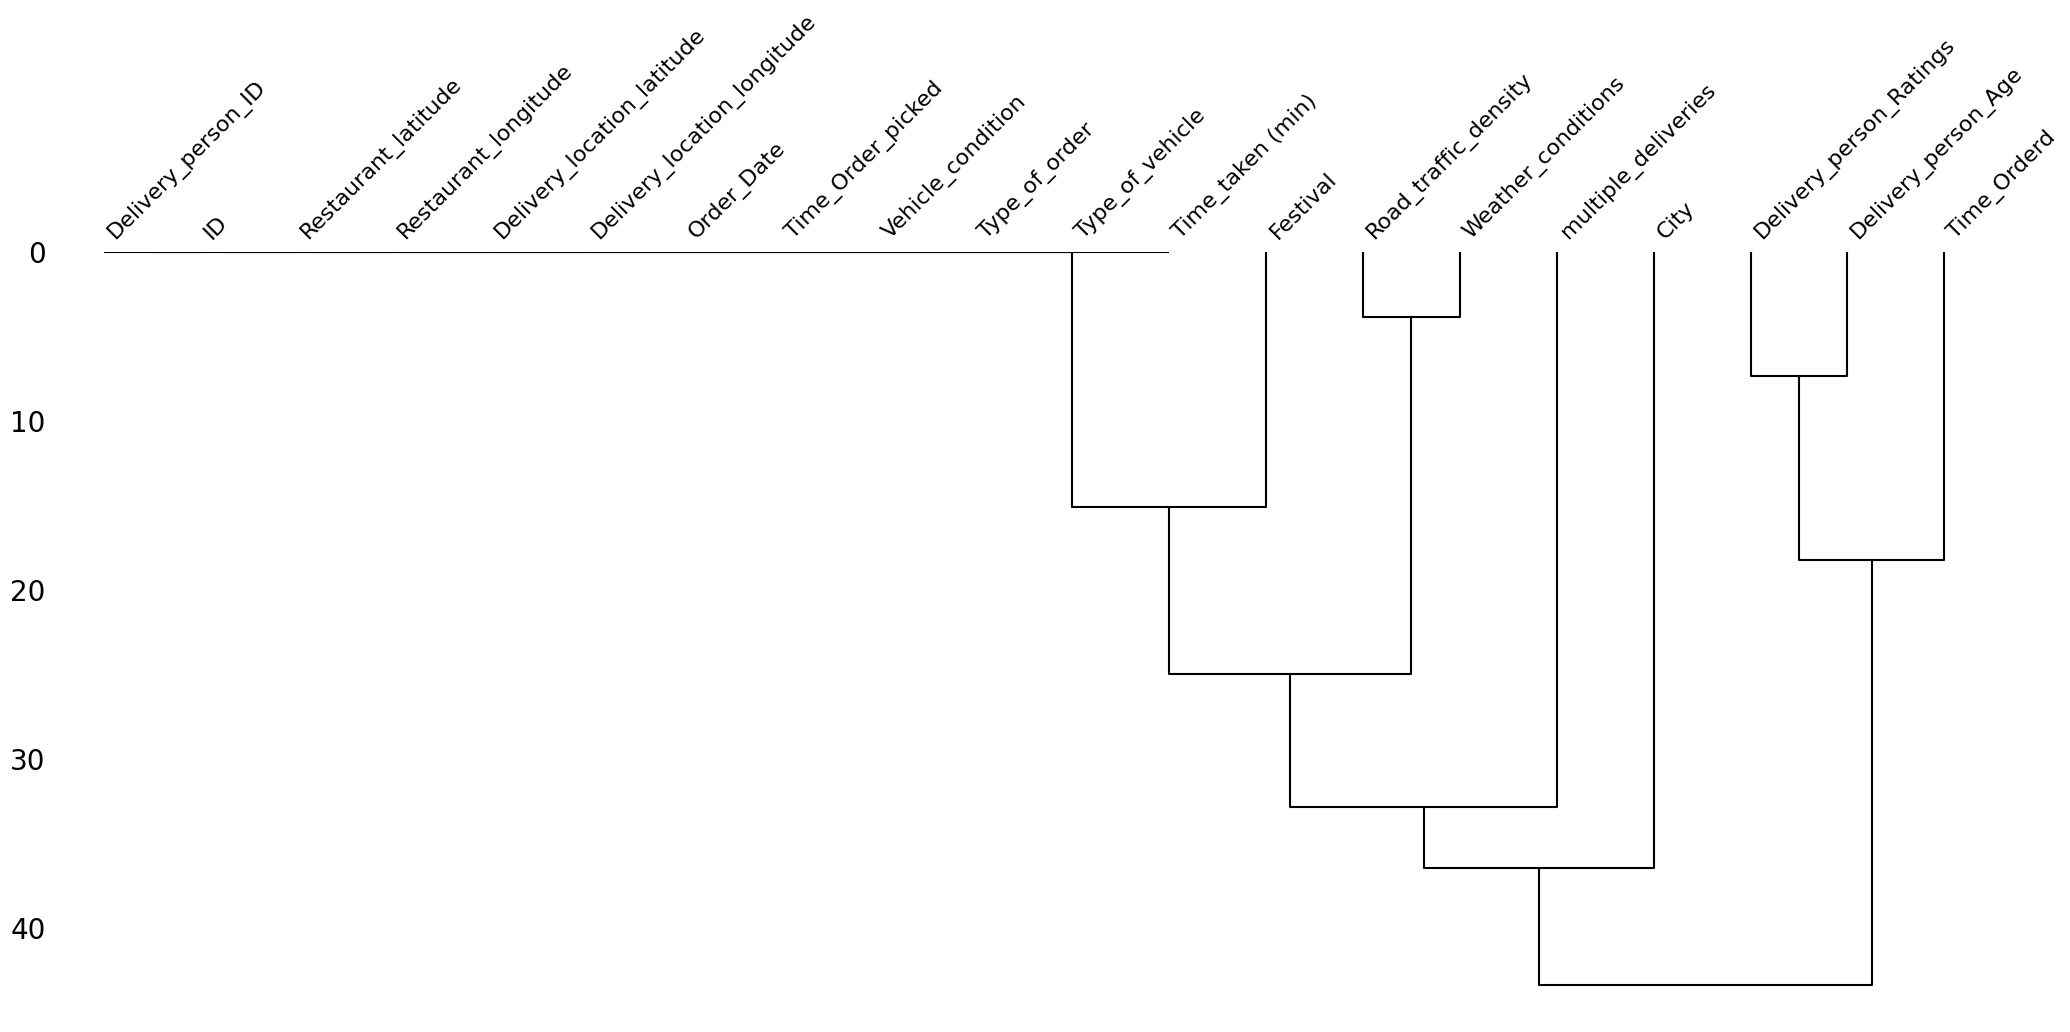

In [12]:
msno.dendrogram(df)

In [13]:
# percentage of rows in the data having missing value

print((df.isna().any(axis=1).sum() / df.shape[0]) * 100,"% missing values in the dataset")

9.268603018603018 % missing values in the dataset


In [14]:
def change_column_names(data: pd.DataFrame):
    return (
        data.rename(str.lower,axis=1)
        .rename({
            "delivery_person_id" : "rider_id",
            "delivery_person_age": "age",
            "delivery_person_ratings": "ratings",
            "delivery_location_latitude": "delivery_latitude",
            "delivery_location_longitude": "delivery_longitude",
            "time_orderd": "order_time",
            "time_order_picked": "order_picked_time",
            "weathercondditions": "weather",
            "road_traffic_density": "traffic",
            "city": "city_type",
            "time_taken(min)": "time_taken"},axis=1)
    )

# change column names

df = change_column_names(df)

In [15]:
(
    df.dtypes
    .rename('data_types').reset_index()
)


,index,data_types
0,id,object
1,rider_id,object
2,age,float64
3,ratings,float64
4,restaurant_latitude,float64
5,restaurant_longitude,float64
6,delivery_latitude,float64
7,delivery_longitude,float64
8,order_date,object
9,order_time,object


In [16]:
df.head()

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_picked_time,weather_conditions,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12/2/2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,4/3/2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,9:20,9:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


# Column wise Checking and Cleaning

## ID

In [17]:
df['id'].nunique()

45584

## Rider_id

In [18]:
df['rider_id'].nunique()

1320

* There are 1320 unique rider id's 

In [19]:
df['rider_id'].value_counts()

rider_id
JAPRES11DEL02     67
PUNERES01DEL01    67
VADRES11DEL02     66
VADRES08DEL02     66
JAPRES03DEL01     66
                  ..
GOARES01DEL03      7
DEHRES18DEL03      7
KOCRES16DEL03      6
KOLRES09DEL03      6
BHPRES010DEL03     5
Name: count, Length: 1320, dtype: int64

* There are City names in the id , so we will extract the City_code it would be a usefull column 

In [20]:
## extract city name out of rider id

(
    df['rider_id']
    .str.split("RES")
    .str.get(0)
    .rename("City_Name")
)

0           DEH
1           KOC
2          PUNE
3          LUDH
4           KNP
          ...  
45579       JAP
45580       AGR
45581      CHEN
45582     COIMB
45583    RANCHI
Name: City_Name, Length: 45584, dtype: object

## age

In [21]:
df['age'].dtype

dtype('float64')

In [22]:
df['age'].describe()

count    43730.000000
mean        29.566911
std          5.815064
min         15.000000
25%         25.000000
50%         30.000000
75%         35.000000
max         50.000000
Name: age, dtype: float64

## Observation : 
1. the minimum age is suspicious 15 

In [23]:
# rows of data where rider age is less than 18(minor)


minors_data = df.loc[df['age'].astype('float') < 18]

minors_data

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_picked_time,weather_conditions,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken (min)
2378,0x564,JAPRES15DEL03,15.0,1.0,-26.891191,75.802083,26.981191,75.892083,12/3/2022,NaN,17:20,NaN,NaN,3,Meal,motorcycle,0.0,No,Urban,15
2896,0xcd0,INDORES010DEL03,15.0,1.0,22.750040,75.902847,22.810040,75.962847,3/4/2022,NaN,20:30,NaN,NaN,3,Snack,scooter,1.0,No,Metropolitian,29
2942,0x91a,SURRES17DEL03,15.0,1.0,21.149569,72.772697,21.209569,72.832697,21-03-2022,NaN,22:10,NaN,NaN,3,Buffet,bicycle,1.0,No,Metropolitian,20
5893,0x474,CHENRES15DEL03,15.0,1.0,13.026286,80.275235,13.056286,80.305235,11/3/2022,NaN,20:50,NaN,NaN,3,Drinks,bicycle,1.0,No,Metropolitian,25
9147,0x73f,BANGRES05DEL01,15.0,1.0,12.970324,77.645748,13.080324,77.755748,25-03-2022,NaN,23:25,NaN,NaN,3,Buffet,motorcycle,2.0,No,Metropolitian,34
10891,0x1b49,MUMRES14DEL02,15.0,1.0,19.181300,72.836191,19.231300,72.886191,30-03-2022,NaN,20:55,NaN,NaN,3,Buffet,motorcycle,1.0,No,Metropolitian,39
11116,0x40b,SURRES12DEL01,15.0,1.0,-21.183434,-72.814492,21.193434,72.824492,5/3/2022,NaN,11:30,NaN,NaN,3,Meal,scooter,1.0,No,Urban,27
12084,0x523,INDORES03DEL02,15.0,1.0,22.751857,75.866699,22.801857,75.916699,24-03-2022,NaN,21:15,NaN,NaN,3,Buffet,bicycle,0.0,No,Metropolitian,28
15115,0x18b0,RANCHIRES02DEL01,15.0,1.0,0.000000,0.000000,0.070000,0.070000,16-03-2022,NaN,23:55,NaN,NaN,3,Meal,bicycle,1.0,No,Metropolitian,21
15918,0x550,CHENRES08DEL02,15.0,1.0,13.022394,80.242439,13.072394,80.292439,11/3/2022,NaN,18:10,NaN,NaN,3,Snack,bicycle,0.0,No,Metropolitian,17


## Observations : 
1. The star ratings of all the riders is 1.
2. The vehicle condition of these riders is very bad.
3. No weather and traffic conditions available.
4. Age of all these riders is 15 which is below the permissable age to drive a vehicle.
5. Latitude and Longitude values in negative which is not possible. India is situated above the equator so all latitudes should be positive and east of meridian line so longitudes are positive as well.


In [24]:
print(minors_data.shape[0],"Rows")

38 Rows


In [25]:
## Ratings
df['ratings'].describe()

count    43676.000000
mean         4.633774
std          0.334744
min          1.000000
25%          4.500000
50%          4.700000
75%          4.900000
max          6.000000
Name: ratings, dtype: float64

## Observations : 
1. the minimum values are 1, the riders are minors
2. the maximum rating in 6.0, it could be a data error representing the Dirty data 

<Axes: ylabel='ratings'>

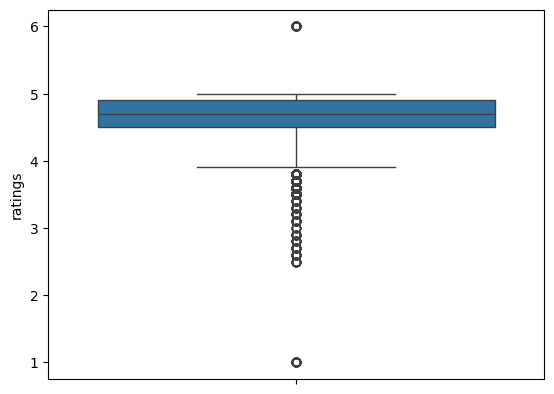

In [26]:
# Boxplot 
sns.boxplot(df['ratings'].astype(float))

In [27]:
# checking for the 6 star ratings riders

six_star_data = df.loc[df['ratings'] == 6]
six_star_data

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_picked_time,weather_conditions,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken (min)
3577,0x46d,BANGRES05DEL01,50.0,6.0,-12.970324,-77.645748,13.010324,77.685748,13-03-2022,NaN,12:30,NaN,NaN,3,Meal,electric_scooter,0.0,No,Urban,25
4705,0x493,HYDRES17DEL01,50.0,6.0,-17.451976,-78.385883,17.561976,78.495883,4/4/2022,NaN,23:20,NaN,NaN,3,Snack,bicycle,0.0,No,Metropolitian,27
5160,0x4f2,JAPRES08DEL01,50.0,6.0,-26.910262,-75.783013,27.020262,75.893013,18-03-2022,NaN,18:50,NaN,NaN,3,Drinks,scooter,1.0,No,Metropolitian,20
5353,0x430,BANGRES19DEL01,50.0,6.0,12.914264,77.678400,13.024264,77.788400,6/4/2022,NaN,20:55,NaN,NaN,3,Meal,electric_scooter,1.0,No,Metropolitian,18
5642,0xbef1,AGRRES13DEL02,50.0,6.0,-27.159795,-78.042990,27.209795,78.092990,13-02-2022,NaN,18:05,NaN,NaN,3,Drinks,scooter,1.0,No,Metropolitian,20
6385,0x427,JAPRES06DEL02,50.0,6.0,26.911927,75.797282,27.041927,75.927282,2/4/2022,NaN,22:10,NaN,NaN,3,Meal,electric_scooter,0.0,No,Urban,20
7022,0x3eb,MYSRES15DEL02,50.0,6.0,-12.352058,-76.606650,12.372058,76.626650,15-03-2022,NaN,0.416666667,NaN,NaN,3,Buffet,scooter,1.0,No,Metropolitian,14
7672,0xd42,VADRES09DEL01,50.0,6.0,0.000000,0.000000,0.010000,0.010000,21-03-2022,NaN,8:35,NaN,NaN,3,Meal,bicycle,1.0,No,Metropolitian,22
9490,0x3f0,BANGRES010DEL01,50.0,6.0,12.933298,77.614293,13.003298,77.684293,12/3/2022,NaN,18:25,NaN,NaN,3,Drinks,scooter,1.0,No,Urban,17
9526,0x3ef,RANCHIRES13DEL01,50.0,6.0,-23.374989,-85.335486,23.444989,85.405486,20-03-2022,NaN,17:55,NaN,NaN,3,Snack,bicycle,1.0,No,Metropolitian,32


In [28]:
# no of rows
six_star_data.shape[0]

53

## Location columns 

In [29]:
loc_cols = df.columns[4:8].tolist()
loc_data = df.loc[:,loc_cols]

loc_data.describe()

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
count,45584.000000,45584.000000,45584.000000,45584.000000
mean,17.017948,70.229684,17.465480,70.844161
std,8.185674,22.885575,7.335562,21.120578
min,-30.905562,-88.366217,0.010000,0.010000
25%,12.933284,73.170000,12.988453,73.280000
50%,18.551440,75.897963,18.633934,76.002574
75%,22.728163,78.044095,22.785049,78.107044
max,30.914057,88.433452,31.054057,88.563452


## Valid values for lat and long

 > India lies to the north of the equator between `6° 44′` and `35° 30′` north latitude and `68° 7′` and `97° 25′` east longitude.
> So we will remove the values which are incorrect

In [30]:
# set the lower bound limits for the lat and long

lower_bound_lat = 6.44
lower_bound_long = 68.70

In [31]:
# rows of data where latitude and longitude values are below the bounds

df.loc[
    (df['restaurant_latitude'] < lower_bound_lat) |
    (df['restaurant_longitude'] < lower_bound_long) |
    (df['delivery_latitude'] < lower_bound_lat) |
    (df['delivery_longitude'] < lower_bound_long)
].shape[0]

4071

In [32]:
## There are 4071 rows of the incorrect data of locations 

# statistical summary of problematic rows where lat long is below the country's geographical limits

loc_data.loc[
    (loc_data['restaurant_latitude'] < lower_bound_lat) |
    (loc_data['restaurant_longitude'] < lower_bound_long) |
    (loc_data['delivery_latitude'] < lower_bound_lat) |
    (loc_data['delivery_longitude'] < lower_bound_long)
].describe()

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
count,4071.000000,4071.000000,4071.000000,4071.000000
mean,-2.149416,2.068601,2.212538,8.299885
std,6.537913,25.270676,6.538283,23.980011
min,-30.905562,-88.366217,0.010000,0.010000
25%,0.000000,0.000000,0.040000,0.040000
50%,0.000000,0.000000,0.070000,0.070000
75%,0.000000,0.000000,0.110000,0.110000
max,0.000000,88.433452,31.045562,88.523452


(array([1, 2, 3, 4]),
 [Text(1, 0, 'restaurant_latitude'),
  Text(2, 0, 'restaurant_longitude'),
  Text(3, 0, 'delivery_latitude'),
  Text(4, 0, 'delivery_longitude')])

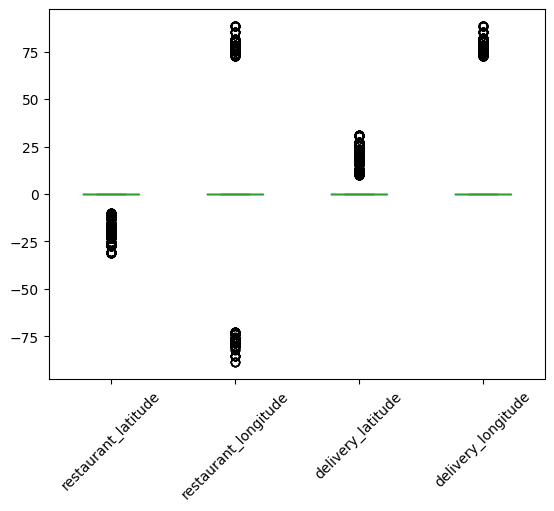

In [33]:
loc_data.loc[
    (loc_data['restaurant_latitude'] < lower_bound_lat) |
    (loc_data['restaurant_longitude'] < lower_bound_long) |
    (loc_data['delivery_latitude'] < lower_bound_lat) |
    (loc_data['delivery_longitude'] < lower_bound_long)
].plot(kind= 'box')

plt.xticks(rotation=45)

**Negative Values are correct just we have to take absolute**

**While calculating the distances we can assign null values to these erroneous data points and then impute the values using advanced imputation techniques**

[Text(1, 0, 'restaurant_latitude'),
 Text(2, 0, 'restaurant_longitude'),
 Text(3, 0, 'delivery_latitude'),
 Text(4, 0, 'delivery_longitude')]

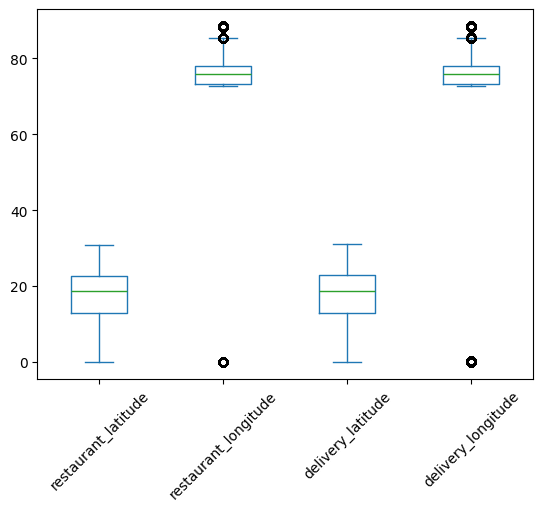

In [34]:
# taking the absolute values

(
    loc_data.abs()
    .plot(kind="box")
)

ax = plt.gca()

ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

In [35]:
# number of rows after taking absolute values

(
    loc_data.abs()
    .loc[lambda df_:
        (df_['restaurant_latitude'] < lower_bound_lat) |
        (df_['restaurant_longitude'] < lower_bound_long) |
        (df_['delivery_latitude'] < lower_bound_lat) |
        (df_['delivery_longitude'] < lower_bound_long)]
    .shape[0]

)

3640

In [36]:
def clean_lat_long(data: pd.DataFrame, threshold=1):
    location_columns = loc_data.columns.tolist()

    return (
        data
        .assign(**{
            col: (
                np.where(data[col] < threshold, np.NaN, data[col].values)
            )
            for col in location_columns
        })
    )

In [37]:
clean_lat_long(df).isna().sum()

id                         0
rider_id                   0
age                     1854
ratings                 1908
restaurant_latitude     4071
restaurant_longitude    3802
delivery_latitude       3640
delivery_longitude      3640
order_date                 0
order_time              1731
order_picked_time          0
weather_conditions       616
traffic                  601
vehicle_condition          0
type_of_order              0
type_of_vehicle            0
multiple_deliveries      993
festival                 228
city_type               1200
time_taken (min)           0
dtype: int64

## Order_date

In [38]:
# +unique values in order date

df['order_date'].nunique()

44

**There are 44 unique dates**

In [39]:
# date range

order_date = pd.to_datetime(df['order_date'],dayfirst=True,format= 'mixed')

order_date.max() - order_date.min()

Timedelta('54 days 00:00:00')

In [40]:
order_date.agg(['min', 'max']).set_axis(['Start',"End"],axis= 0)

Start   2022-02-11
End     2022-04-06
Name: order_date, dtype: datetime64[ns]

In [41]:
# extract day, day name, month and year

def extract_datetime_features(ser):
    date_col = pd.to_datetime(ser,dayfirst=True,format='mixed')

    return (
        pd.DataFrame(
            {
                "day": date_col.dt.day,
                "month": date_col.dt.month,
                "year": date_col.dt.year,
                "day_of_week": date_col.dt.day_name(),
                "is_weekend": date_col.dt.day_name().isin(["Saturday","Sunday"]).astype(int)
            }
        ))

In [42]:
extract_datetime_features(df['order_date'])

,day,month,year,day_of_week,is_weekend
0,12,2,2022,Saturday,1
1,13,2,2022,Sunday,1
2,4,3,2022,Friday,0
3,13,2,2022,Sunday,1
4,14,2,2022,Monday,0
...,...,...,...,...,...
45579,24,3,2022,Thursday,0
45580,16,2,2022,Wednesday,0
45581,11,3,2022,Friday,0
45582,7,3,2022,Monday,0


## Order_time

In [43]:
df['order_date'] = pd.to_datetime(df['order_date'],format='mixed',errors='coerce')

In [44]:
temp = df['order_date'].dt.hour

In [45]:
# extract hour info from data

order_time_hr = pd.to_datetime(df.replace("NaN ",np.NaN)['order_time'],format='mixed',errors='coerce').dt.hour

order_time_hr

0        21.0
1        14.0
2        17.0
3         9.0
4        19.0
         ... 
45579    11.0
45580    19.0
45581    23.0
45582    13.0
45583    17.0
Name: order_time, Length: 45584, dtype: float64

In [46]:
def time_of_day(ser):
    '''
    This func need series as input
    '''
    
    time_col = pd.to_datetime(ser,format='mixed').dt.hour

    return(
        np.select(condlist=[(ser.between(6,12,inclusive='left')),
                            (ser.between(12,17,inclusive='left')),
                            (ser.between(17,20,inclusive='left')),
                            (ser.between(20,24,inclusive='left'))],
                  choicelist=["morning","afternoon","evening","night"],
                  default="after_midnight")
    )

In [47]:
time_subset = df.loc[:,["order_time","order_picked_time"]]
time_subset

,order_time,order_picked_time
0,21:55,22:10
1,14:55,15:05
2,17:30,17:40
3,9:20,9:30
4,19:50,20:05
...,...,...
45579,11:35,11:45
45580,19:55,20:10
45581,23:50,24:05:00
45582,13:35,13:40


In [48]:
## EDITbbb

In [49]:
# calculate the pickup time

(
    time_subset
    .assign(**{
        col: pd.to_datetime(time_subset[col].dropna(),format="mixed",errors='coerce')
        for col in time_subset.columns.tolist()}
    )
    .assign(
        pickup_time = lambda x: (x['order_picked_time'] - x['order_time']).dt.seconds / 60,
        order_time_hour = lambda x: x['order_time'].dt.hour,
        order_time_of_day = lambda x: x['order_time_hour'].pipe(time_of_day)
    )
    .drop(columns=["order_time","order_picked_time"])
)

,pickup_time,order_time_hour,order_time_of_day
0,15.0,21.0,night
1,10.0,14.0,afternoon
2,10.0,17.0,evening
3,10.0,9.0,morning
4,15.0,19.0,evening
...,...,...,...
45579,10.0,11.0,morning
45580,15.0,19.0,evening
45581,NaN,23.0,night
45582,5.0,13.0,afternoon


In [95]:
# df['order_picked_time'] = df['order_picked_time'].astype('datetime64')

df['order_picked_time'] = pd.to_datetime(df['order_picked_time'], errors='coerce')
df['order_time'] = pd.to_datetime(df['order_time'], errors='coerce')


C:\Users\Degana computer\AppData\Local\Temp\ipykernel_9104\538189708.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order_time'] = pd.to_datetime(df['order_time'], errors='coerce')


In [90]:
df.order_picked_time.dtype

dtype('<M8[ns]')

## Weather

In [54]:
# value counts

df['weather_conditions'].value_counts()

weather_conditions
Fog           7653
Stormy        7584
Cloudy        7533
Sandstorms    7494
Windy         7422
Sunny         7282
Name: count, dtype: int64

## Traffic Condition

In [55]:
df['traffic'].value_counts()

traffic
Low       15476
Jam       14139
Medium    10945
High       4423
Name: count, dtype: int64

## Vehicle Condition 

In [56]:
# unique values in column

np.sort(df['vehicle_condition'].unique())

array([0, 1, 2, 3], dtype=int64)

In [57]:
# value counts

df['type_of_order'].value_counts()

type_of_order
Snack     11530
Meal      11456
Drinks    11321
Buffet    11277
Name: count, dtype: int64

In [58]:
(
    df['type_of_order']
    .str.rstrip()
    .str.lower()
    .unique()
)

array(['snack', 'meal', 'drinks', 'buffet'], dtype=object)

## Types of Vehicle

In [59]:
# value counts

df['type_of_vehicle'].value_counts()

type_of_vehicle
motorcycle          26429
scooter             15273
electric_scooter     3814
bicycle                68
Name: count, dtype: int64

In [60]:
(
    df['type_of_vehicle']
    .str.rstrip()
    .str.lower()
    .unique()
)

array(['motorcycle', 'scooter', 'electric_scooter', 'bicycle'],
      dtype=object)

## multiple deliveries

In [61]:
df['multiple_deliveries'].dtype

dtype('float64')

## Festivals

In [62]:
# unique values in column

df['festival'].unique()

array(['No', 'Yes', nan], dtype=object)

In [63]:
(
    df['festival']
    .replace("NaN ",np.NaN)
    .str.rstrip()
    .str.lower()
    .unique()
)

array(['no', 'yes', nan], dtype=object)

## City

In [64]:
# unique values in city type

df['city_type'].unique()

array(['Metropolitian', 'Urban', 'Semi-Urban', nan], dtype=object)

In [65]:
(
    df['city_type']
    .replace("NaN ",np.NaN)
    .str.rstrip()
    .str.lower()
    .unique()
)

array(['metropolitian', 'urban', 'semi-urban', nan], dtype=object)

## Time taken


In [66]:
df['time_taken (min)'].dtype

dtype('int64')

In [67]:
df['time_taken (min)']

0        46
1        23
2        21
3        20
4        41
         ..
45579    32
45580    36
45581    16
45582    26
45583    36
Name: time_taken (min), Length: 45584, dtype: int64

In [68]:
df.columns.tolist()

['id',
 'rider_id',
 'age',
 'ratings',
 'restaurant_latitude',
 'restaurant_longitude',
 'delivery_latitude',
 'delivery_longitude',
 'order_date',
 'order_time',
 'order_picked_time',
 'weather_conditions',
 'traffic',
 'vehicle_condition',
 'type_of_order',
 'type_of_vehicle',
 'multiple_deliveries',
 'festival',
 'city_type',
 'time_taken (min)']

In [91]:
def data_cleaning(data: pd.DataFrame):
    return (
        data
        # Drop unnecessary columns and specific indexes
        .drop(columns="id")
        
        # Assign new columns
        
        .assign(
            # Extracting city column out of rider id
            city_name =lambda x: x['rider_id'].str.split("RES").str.get(0),

            # Absolute values for location-based columns
            restaurant_latitude=lambda x: x['restaurant_latitude'].abs(),
            restaurant_longitude=lambda x: x['restaurant_longitude'].abs(),
            delivery_latitude=lambda x: x['delivery_latitude'].abs(),
            delivery_longitude=lambda x: x['delivery_longitude'].abs(),

            # Order date to datetime and feature extraction
            order_date=lambda x: pd.to_datetime(x['order_date'], dayfirst=True, errors='coerce'),
            order_day=lambda x: x['order_date'].dt.day,
            order_month=lambda x: x['order_date'].dt.month,
            order_day_of_week=lambda x: x['order_date'].dt.day_name().str.lower(),
            is_weekend=lambda x: x['order_date'].dt.day_name().isin(["Saturday", "Sunday"]).astype(int),

            # Time-based columns
            order_time=lambda x: pd.to_datetime(x['order_time'], errors='coerce'),
            order_picked_time=lambda x: pd.to_datetime(x['order_picked_time'], errors='coerce'),
            pickup_time_minutes=lambda x: (
                (x['order_picked_time'] - x['order_time']).dt.seconds / 60
            ),
            order_time_hour=lambda x: x['order_time'].dt.hour,
            order_time_of_day=lambda x: x['order_time_hour'].pipe(time_of_day),

            # Categorical columns
            traffic=lambda x: x['traffic'].str.rstrip().str.lower(),
            type_of_order=lambda x: x['type_of_order'].str.rstrip().str.lower(),
            type_of_vehicle=lambda x: x['type_of_vehicle'].str.rstrip().str.lower(),
            festival=lambda x: x['festival'].str.rstrip().str.lower(),
            city_type=lambda x: x['city_type'].str.rstrip().str.lower(),
        )
    )


In [98]:
tempp_order =(df['order_picked_time'] - df['order_time']).dt.seconds / 60
tempp_order.isnull().sum()

AttributeError: 'Series' object has no attribute 'ISNULL'

In [71]:
data_cleaning(df)

C:\Users\Degana computer\AppData\Local\Temp\ipykernel_9104\363144445.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  order_time=lambda x: pd.to_datetime(x['order_time'], errors='coerce'),
C:\Users\Degana computer\AppData\Local\Temp\ipykernel_9104\363144445.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  order_picked_time=lambda x: pd.to_datetime(x['order_picked_time'], errors='coerce'),


,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_picked_time,...,city_type,time_taken (min),city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-12-02,2025-02-04 21:55:00,2025-02-04 22:10:00,...,metropolitian,46,DEH,2,12,friday,0,15.0,21.0,night
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,2025-02-04 14:55:00,2025-02-04 15:05:00,...,metropolitian,23,KOC,13,2,sunday,1,10.0,14.0,afternoon
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-04-03,2025-02-04 17:30:00,2025-02-04 17:40:00,...,metropolitian,21,PUNE,3,4,sunday,1,10.0,17.0,evening
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,2025-02-04 09:20:00,2025-02-04 09:30:00,...,metropolitian,20,LUDH,13,2,sunday,1,10.0,9.0,morning
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,2025-02-04 19:50:00,2025-02-04 20:05:00,...,metropolitian,41,KNP,14,2,monday,0,15.0,19.0,evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,2025-02-04 11:35:00,2025-02-04 11:45:00,...,metropolitian,32,JAP,24,3,thursday,0,10.0,11.0,morning
45580,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,2025-02-04 19:55:00,2025-02-04 20:10:00,...,metropolitian,36,AGR,16,2,wednesday,0,15.0,19.0,evening
45581,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-11-03,2025-02-04 23:50:00,NaT,...,metropolitian,16,CHEN,3,11,thursday,0,NaN,23.0,night
45582,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-07-03,2025-02-04 13:35:00,2025-02-04 13:40:00,...,metropolitian,26,COIMB,3,7,sunday,1,5.0,13.0,afternoon


In [73]:
df.isnull().sum()

id                         0
rider_id                   0
age                     1854
ratings                 1908
restaurant_latitude        0
restaurant_longitude       0
delivery_latitude          0
delivery_longitude         0
order_date                 0
order_time              1731
order_picked_time          0
weather_conditions       616
traffic                  601
vehicle_condition          0
type_of_order              0
type_of_vehicle            0
multiple_deliveries      993
festival                 228
city_type               1200
time_taken (min)           0
dtype: int64

In [74]:
loc_data.columns.tolist()

['restaurant_latitude',
 'restaurant_longitude',
 'delivery_latitude',
 'delivery_longitude']

In [75]:
def calculate_haversine_distance(df):
    lat1 = df['restaurant_latitude']
    lon1 = df['restaurant_longitude']
    lat2 = df['delivery_latitude']
    lon2 = df['delivery_longitude']


    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(
        dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    distance = 6371 * c

    return (
        df.assign(
            distance = distance)
    )

In [76]:
# add more data cleaning steps

cleaned_data = (
                df.pipe(data_cleaning)
                .pipe(clean_lat_long)
                .pipe(calculate_haversine_distance)
                )


C:\Users\Degana computer\AppData\Local\Temp\ipykernel_9104\363144445.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  order_time=lambda x: pd.to_datetime(x['order_time'], errors='coerce'),
C:\Users\Degana computer\AppData\Local\Temp\ipykernel_9104\363144445.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  order_picked_time=lambda x: pd.to_datetime(x['order_picked_time'], errors='coerce'),


In [77]:
## Rounding off
cleaned_data['distance'] = round(cleaned_data['distance'],2)

In [78]:
cleaned_data.drop(columns= ['order_time', 'order_picked_time'], inplace = True)

In [79]:
cleaned_data = cleaned_data[cleaned_data['age'] != 50]
cleaned_data = cleaned_data[cleaned_data['age'] != 15]


In [80]:
## Save cleaned data 
cleaned_data.to_csv("cleaned_data.csv",index=False)

In [81]:
cleaned_data_load = pd.read_csv("cleaned_data.csv")

In [82]:
cleaned_data_load

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather_conditions,traffic,...,time_taken (min),city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day,distance
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-12-02,Fog,jam,...,46,DEH,2,12,friday,0,15.0,21.0,night,10.28
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,Stormy,high,...,23,KOC,13,2,sunday,1,10.0,14.0,afternoon,6.24
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-04-03,Sandstorms,medium,...,21,PUNE,3,4,sunday,1,10.0,17.0,evening,13.79
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,Sandstorms,low,...,20,LUDH,13,2,sunday,1,10.0,9.0,morning,2.93
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,Fog,jam,...,41,KNP,14,2,monday,0,15.0,19.0,evening,19.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45488,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,Windy,high,...,32,JAP,24,3,thursday,0,10.0,11.0,morning,1.49
45489,AGRRES16DEL01,21.0,4.6,NaN,NaN,NaN,NaN,2022-02-16,Windy,jam,...,36,AGR,16,2,wednesday,0,15.0,19.0,evening,NaN
45490,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-11-03,Cloudy,low,...,16,CHEN,3,11,thursday,0,NaN,23.0,night,4.66
45491,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-07-03,Cloudy,high,...,26,COIMB,3,7,sunday,1,5.0,13.0,afternoon,6.23


In [83]:
cleaned_data_load.isnull().sum()

rider_id                    0
age                      1854
ratings                  1908
restaurant_latitude      3630
restaurant_longitude     3630
delivery_latitude        3630
delivery_longitude       3630
order_date                  0
weather_conditions        525
traffic                   510
vehicle_condition           0
type_of_order               0
type_of_vehicle             0
multiple_deliveries       993
festival                  228
city_type                1198
time_taken (min)            0
city_name                   0
order_day                   0
order_month                 0
order_day_of_week           0
is_weekend                  0
pickup_time_minutes     10086
order_time_hour          5708
order_time_of_day           0
distance                 3630
dtype: int64

In [78]:
df

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_picked_time,weather_conditions,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-12-02,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-04-03,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,9:20,9:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35,11:45,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32
45580,0xd641,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55,20:10,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36
45581,0x4f8d,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-11-03,23:50,24:05:00,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16
45582,0x5eee,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-07-03,13:35,13:40,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26


In [79]:
# number of rows in the data that have missing values

missing_rows = (
    df
    .isnull()
    .any(axis=1)
    .sum()
)

print(f'There are {missing_rows} rows with missing values in the data.')

print(f"It accounts for {(missing_rows/df.shape[0])*100:.2f}% of the data")

There are 4225 rows with missing values in the data.
It accounts for 9.27% of the data


In [80]:
# number of rows in the data that have missing values

missing_rows = (
    cleaned_data_load
    .isnull()
    .any(axis=1)
    .sum()
)

print(f'There are {missing_rows} rows with missing values in the data.')

print(f"It accounts for {(missing_rows/cleaned_data_load.shape[0])*100:.2f}% of the data")

There are 14738 rows with missing values in the data.
It accounts for 32.40% of the data


**Observations** 

* The star ratings of all the riders is 1.
* The vehicle condition of these riders is very bad.
* No weather and traffic conditions available.
* Age of all these riders is 15 which is below the permissable age to drive a vehicle.
Latitude and Longitude values in negative which is not possible. India is situated above the equator so all latitudes should be positive and east of meridian line so longitudes are positive as well.

In [84]:
# 45584
cleaned_data_load.shape

(45493, 26)

In [85]:
28000*12

336000